## Book Recommender System

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
user=pd.read_csv('BX-Users.csv',sep=';',error_bad_lines=False,encoding='latin-1')
rating=pd.read_csv('BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding='latin-1')
books=pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/nagarajugooty/opt/anaconda3/lib/python3.7/site-packages/IPython/cor

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
user_rating=pd.merge(user,rating,how='inner')

In [8]:
user_rating.sample(5)

,User-ID,Location,Age,ISBN,Book-Rating
732858,179733,"greenville, texas, usa",26.0,0440211891,0
1141129,277157,"garden grove, california, usa",70.0,0312874243,0
1000579,242299,"orlando, florida, usa",25.0,0670032808,0
331801,81492,"san antonio, texas, usa",28.0,0373192258,0
950249,231857,"canberra, australian capital territory, australia",46.0,0751522791,0


In [9]:
user_rating.drop(['Location','Age'],axis=1,inplace=True)

In [10]:
user_rating.head()

,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


In [12]:
user_rating['Book-Rating'].unique()

array([ 0,  5,  6,  7, 10,  9,  3,  8,  4,  2,  1])

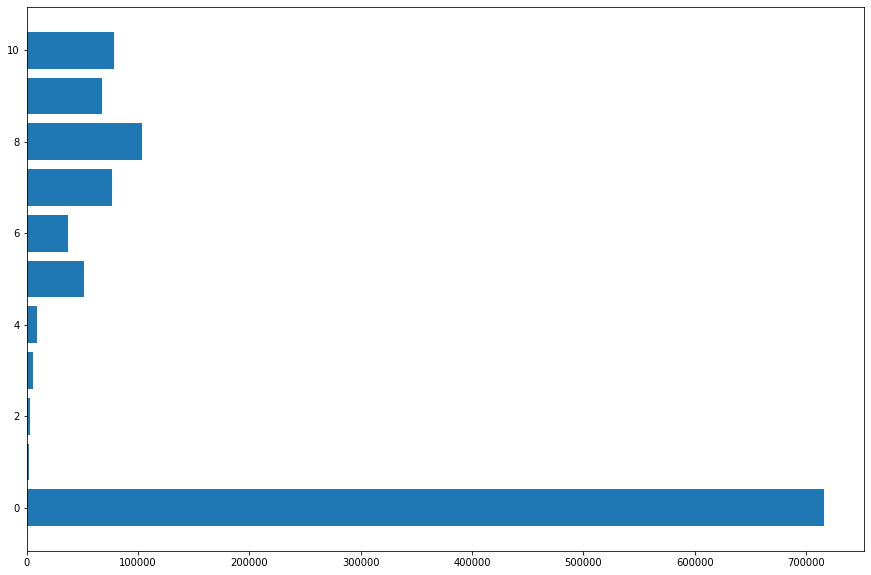

In [13]:
counts=user_rating['Book-Rating'].value_counts()
plt.figure(figsize=(15,10))
plt.barh(counts.index,counts.values)
plt.show()

In [41]:
book_ratings=user_rating.groupby('ISBN')['Book-Rating'].count().clip(lower=50)
book_ratings

ISBN
 0330299891    50
 0375404120    50
 0586045007    50
 9022906116    50
 9032803328    50
               ..
cn113107       50
ooo7156103     50
§423350229     50
´3499128624    50
Ô½crosoft      50
Name: Book-Rating, Length: 340556, dtype: int64

In [42]:
user_ratings=user_rating.groupby('User-ID')['Book-Rating'].count().clip(lower=50)
user_ratings

User-ID
2         50
7         50
8         50
9         50
10        50
          ..
278846    50
278849    50
278851    50
278852    50
278854    50
Name: Book-Rating, Length: 105283, dtype: int64

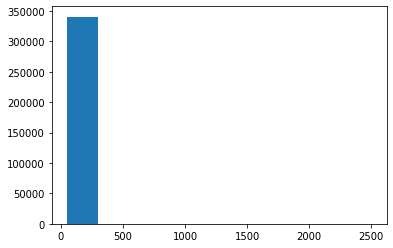

In [23]:
plt.hist(book_ratings)
plt.show()

### Set the threshold values of 50 for both users and ratings of the book

In [43]:
min_book_rating=50
filter_books=user_rating['ISBN'].value_counts()>min_book_rating
filter_books=filter_books[filter_books].index.tolist()

In [ ]:
min_user_rating=50
filter_users=user_rating['User-ID'].value_counts()>min_user_rating
filter_users=filter_users[filter_users].index.tolist()
filter_users

In [45]:
df_new=user_rating[(user_rating['ISBN'].isin(filter_books)) & (user_rating['User-ID'].isin(filter_users))]
df_new.sample(4)

,User-ID,ISBN,Book-Rating
195501,46909,0440224861,7
286391,70052,0316899984,0
496510,123095,0446672211,10
594000,145641,0684863472,0


In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140516 entries, 394 to 1149724
Data columns (total 3 columns):
User-ID        140516 non-null int64
ISBN           140516 non-null object
Book-Rating    140516 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.3+ MB


In [47]:
df_all=pd.merge(df_new,books,on='ISBN',how='inner')

In [48]:
df_all.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,243,0060915544,10,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...
1,882,0060915544,0,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...
2,1435,0060915544,10,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...
3,4017,0060915544,8,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...
4,4622,0060915544,0,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...


In [49]:
df_final=df_all[['User-ID','ISBN','Book-Rating','Book-Title']]

### Create the pivot Table

In [52]:
df_pivot=df_final.pivot(index='ISBN',columns='User-ID',values='Book-Rating').fillna(0)
df_pivot

User-ID,243,254,507,626,638,643,741,882,929,1025,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
000649840X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002026478X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0020442203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028604199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257229534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3404148665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3423202327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from scipy.sparse import csr_matrix

In [56]:
#CSR stands for compressed sparse matrix
#sparse matrix - when you have many number of nulls/0 in a matrix, it is called sparse matrix. 
df_csr_matrix=csr_matrix(df_pivot.values)

In [54]:
#Nearest Neighbours

In [55]:
from sklearn.neighbors import NearestNeighbors

In [57]:
knn_model=NearestNeighbors(metric='cosine',algorithm='auto')
#algorithm types - brute, all, auto, KD_TREE -
knn_model.fit(df_csr_matrix)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [59]:
df_final.loc[df_final['User-ID']==1025]['Book-Title']

16879                             Angela's Ashes: A Memoir
17272                                          Wild Animus
26128      Divine Secrets of the Ya-Ya Sisterhood: A Novel
26503    The Grapes of Wrath: John Steinbeck Centennial...
26539                Restaurant At the End of the Universe
26582                     Life,the Universe and Everything
26613                              A Prayer for Owen Meany
26832                          Jonathan Livingston Seagull
26910                            Notes From a Small Planet
26950                                      Blackberry Wine
26993        The Subtle Knife (His Dark Materials, Book 2)
27026              Northern Lights (His Dark Materials S.)
27067                                 Man and Boy: A Novel
Name: Book-Title, dtype: object

In [76]:
idx=np.random.choice(df_pivot.shape[0])
distance,indices=knn_model.kneighbors(df_pivot.iloc[idx,:].values.reshape(1,-1),n_neighbors=10)
print(idx)

1832


In [77]:
for i in range(0,len(distance.flatten())):
    if i==0:
        title=df_final[df_final['ISBN']==str(df_pivot.index[idx])]['Book-Title'].unique()
        print('Recommendations for {0}:\n'.format(*title.flatten()))
    else:
        recc_title=df_final[df_final['ISBN']==str(df_pivot.index[indices.flatten()[i]])]['Book-Title'].unique()
        print('{0}: {1}, with distance of {2} '.format(i,*recc_title.flatten(),distance.flatten()[i]))
    

Recommendations for Farewell To Arms:

1: Los Alamos: A Novel, with distance of 0.6657411873499564 
2: Women in His Life, with distance of 0.6807872090645397 
3: Lolita (Vintage International), with distance of 0.8107510661964852 
4: Enemy Women: A Novel, with distance of 0.8217772644019801 
5: Five Quarters of the Orange, with distance of 0.8230770387587988 
6: In Cold Blood (Vintage International), with distance of 0.8237957861920391 
7: Bell Jar, with distance of 0.8296730981287764 
8: Cry, the Beloved Country (Oprah's Book Club), with distance of 0.8328524913834195 
9: A Widow for One Year, with distance of 0.8365566826423124 
